**dataset**

In [24]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

In [25]:
batch_size = 8
num_epochs = 40
learning_rate = 0.002
threshold = 0.0011679699386776773

cnn_err_rate = []
ae_err_rate = []

In [26]:
dataset1 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\CNN_dataset10',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

train_loader1 = torch.utils.data.DataLoader(dataset1, batch_size=batch_size)
test_loader1 = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle = True)

#for data, label in dataset1:
 #   print(label)

In [27]:
dataset2 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\CNN_dataset30',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

train_loader2 = torch.utils.data.DataLoader(dataset2, batch_size=batch_size)
test_loader2 = torch.utils.data.DataLoader(dataset2, batch_size=batch_size, shuffle = True)

In [28]:
dataset3 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\CNN_dataset60',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

train_loader3 = torch.utils.data.DataLoader(dataset3, batch_size=batch_size)
test_loader3 = torch.utils.data.DataLoader(dataset3, batch_size=batch_size, shuffle = True)

In [29]:
dataset4 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\CNN_dataset90',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

train_loader4 = torch.utils.data.DataLoader(dataset4, batch_size=batch_size)
test_loader4 = torch.utils.data.DataLoader(dataset4, batch_size=batch_size, shuffle = True)

In [30]:
dataset5 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\CNN_dataset120',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

train_loader5 = torch.utils.data.DataLoader(dataset5, batch_size=batch_size)
test_loader5 = torch.utils.data.DataLoader(dataset5, batch_size=batch_size, shuffle = True)

In [31]:
dataset6 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\CNN_dataset150',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

train_loader6 = torch.utils.data.DataLoader(dataset6, batch_size=batch_size)
test_loader6 = torch.utils.data.DataLoader(dataset6, batch_size=batch_size, shuffle = True)

In [32]:
dataset7 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\CNN_dataset230',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

train_loader7 = torch.utils.data.DataLoader(dataset7, batch_size=batch_size)
test_loader7 = torch.utils.data.DataLoader(dataset7, batch_size=batch_size, shuffle = True)

In [33]:
dataset8 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\CNN_dataset300',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

train_loader8 = torch.utils.data.DataLoader(dataset8, batch_size=batch_size)
test_loader8 = torch.utils.data.DataLoader(dataset8, batch_size=batch_size, shuffle = True)

**CNN model**

In [34]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 12, 5) 
        self.conv3 = nn.Conv2d(12, 24, 4)  
        self.fc1 = nn.Linear(24 * 25 * 25, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 6 * 110 * 110
        x = self.pool(F.relu(self.conv2(x))) # 12 * 53 * 53
        x = self.pool(F.relu(self.conv3(x))) # 24 * 25 * 25
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cnn1 = CNN()
cnn2 = CNN()
cnn3 = CNN()
cnn4 = CNN()
cnn5 = CNN()
cnn6 = CNN()
cnn7 = CNN()
cnn8 = CNN()

cnn1 = cnn1.cuda()
cnn2 = cnn2.cuda()
cnn3 = cnn3.cuda()
cnn4 = cnn4.cuda()
cnn5 = cnn5.cuda()
cnn6 = cnn6.cuda()
cnn7 = cnn7.cuda()
cnn8 = cnn8.cuda()

In [35]:
cnn_criterion = nn.CrossEntropyLoss()
optimizer1 = torch.optim.SGD(cnn1.parameters(), lr=learning_rate)
optimizer2 = torch.optim.SGD(cnn2.parameters(), lr=learning_rate)
optimizer3 = torch.optim.SGD(cnn3.parameters(), lr=learning_rate)
optimizer4 = torch.optim.SGD(cnn4.parameters(), lr=learning_rate)
optimizer5 = torch.optim.SGD(cnn5.parameters(), lr=learning_rate)
optimizer6 = torch.optim.SGD(cnn6.parameters(), lr=learning_rate)
optimizer7 = torch.optim.SGD(cnn7.parameters(), lr=learning_rate)
optimizer8 = torch.optim.SGD(cnn8.parameters(), lr=learning_rate)

***CAE model***

In [36]:
abnormal_set1 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\abnormal10',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

abnormal_loader1 = torch.utils.data.DataLoader(abnormal_set1, batch_size=batch_size,shuffle=True)

In [37]:
abnormal_set2 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\abnormal30',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

abnormal_loader2 = torch.utils.data.DataLoader(abnormal_set2, batch_size=batch_size,shuffle=True)

In [38]:
abnormal_set3 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\abnormal60',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

abnormal_loader3 = torch.utils.data.DataLoader(abnormal_set3, batch_size=batch_size,shuffle=True)

In [39]:
abnormal_set4 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\abnormal90',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

abnormal_loader4 = torch.utils.data.DataLoader(abnormal_set4, batch_size=batch_size,shuffle=True)

In [40]:
abnormal_set5 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\abnormal120',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

abnormal_loader5 = torch.utils.data.DataLoader(abnormal_set5, batch_size=batch_size,shuffle=True)

In [41]:
abnormal_set6 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\abnormal150',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

abnormal_loader6 = torch.utils.data.DataLoader(abnormal_set6, batch_size=batch_size,shuffle=True)

In [42]:
abnormal_set7 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\abnormal230',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

abnormal_loader7 = torch.utils.data.DataLoader(abnormal_set7, batch_size=batch_size,shuffle=True)

In [43]:
abnormal_set8 = datasets.ImageFolder(
    'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\abnormal300',
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

abnormal_loader8 = torch.utils.data.DataLoader(abnormal_set8, batch_size=batch_size,shuffle=True)

In [44]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        
        # Encoder
        self.cnn_layer1 = nn.Sequential(
                        nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
                        nn.ReLU(),
                         nn.MaxPool2d(2,2))

        self.cnn_layer2 = nn.Sequential(
                                nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))
        
        self.cnn_layer3 = nn.Sequential(
                                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))

        # Decoder        
        self.tran_cnn_layer1 = nn.Sequential(
                        nn.ConvTranspose2d(64, 32, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())
        
        self.tran_cnn_layer2 = nn.Sequential(
                        nn.ConvTranspose2d(32, 16, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())

        self.tran_cnn_layer3 = nn.Sequential(
                        nn.ConvTranspose2d(16, 3, kernel_size = 2, stride = 2, padding=0),
                        nn.Sigmoid())  
            
    def forward(self, x):
        output = self.cnn_layer1(x)
        output = self.cnn_layer2(output)
        output = self.cnn_layer3(output)        
        output = self.tran_cnn_layer1(output)
        output = self.tran_cnn_layer2(output)
        output = self.tran_cnn_layer3(output)

        return output

In [45]:
AE = ConvAutoEncoder()
AE.load_state_dict(torch.load('best_model_final.pth'))
ae_criterion = nn.MSELoss()
AE = AE.cuda()

***train(10)***

In [46]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader1, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer1.zero_grad()

        # forward + backward + optimize
        outputs = cnn1(inputs)
        cnn_loss = cnn_criterion(outputs, labels)
        cnn_loss.backward()
        optimizer1.step()

        # print statistics
        running_loss += cnn_loss.item()
        
    print('[%d, %5d] loss: %.7f' %(epoch, num_epochs, running_loss/len(train_loader1)))
    
print('Finished Training')
    
with torch.no_grad():
    error = 0
    total = 0
    for data in test_loader1:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        
        # calculate outputs by running images through the network 
        outputs = cnn1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        error += (predicted != labels).sum().item()

cnn_err_rate.append(error/total)
print('Error rate of test images: %f' % (error / total))


ae_err = 0
for i, (X_abnormal, _) in enumerate(abnormal_loader1):
    X_abnormal = X_abnormal.cuda()
    output = AE(X_abnormal)
    ae_loss = ae_criterion(X_abnormal, output)
        
    if ae_loss.item() < threshold:
        ae_err += 1
    
ae_err_rate.append(ae_err)
print('AE error rate : %.6f ' %(ae_err/len(abnormal_loader1)))

[0,    40] loss: 0.3891297
[1,    40] loss: 3.3202375
[2,    40] loss: 0.6439550
[3,    40] loss: 0.4619604
[4,    40] loss: 0.5278840
[5,    40] loss: 0.4670880
[6,    40] loss: 0.4489288
[7,    40] loss: 0.4491248
[8,    40] loss: 0.4543119
[9,    40] loss: 0.4537917
[10,    40] loss: 0.4479744
[11,    40] loss: 0.4453162
[12,    40] loss: 0.4454958
[13,    40] loss: 0.4450632
[14,    40] loss: 0.4434886
[15,    40] loss: 0.4416584
[16,    40] loss: 0.4396521
[17,    40] loss: 0.4361106
[18,    40] loss: 0.4421771
[19,    40] loss: 0.4481117
[20,    40] loss: 0.4286830
[21,    40] loss: 0.4079871
[22,    40] loss: 0.4479164
[23,    40] loss: 0.4084883
[24,    40] loss: 0.3854104
[25,    40] loss: 0.3705044
[26,    40] loss: 0.3428984
[27,    40] loss: 0.3134645
[28,    40] loss: 0.2350283
[29,    40] loss: 0.1979423
[30,    40] loss: 0.1084272
[31,    40] loss: 0.0616375
[32,    40] loss: 0.0041925
[33,    40] loss: 0.0003941
[34,    40] loss: 0.0000834
[35,    40] loss: 0.0000450
[3

***train(30)***

In [47]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader2, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer2.zero_grad()

        # forward + backward + optimize
        outputs = cnn2(inputs)
        cnn_loss = cnn_criterion(outputs, labels)
        cnn_loss.backward()
        optimizer2.step()

        # print statistics
        running_loss += cnn_loss.item()
        
    print('[%d, %5d] loss: %.7f' %(epoch, num_epochs, running_loss/len(train_loader2)))
    
print('Finished Training')
    
with torch.no_grad():
    error = 0
    total = 0
    for data in test_loader2:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        
        # calculate outputs by running images through the network 
        outputs = cnn2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        error += (predicted != labels).sum().item()

cnn_err_rate.append(error/total)
print('Error rate of test images: %f' % (error / total))


ae_err = 0
for i, (X_abnormal, _) in enumerate(abnormal_loader2):
    X_abnormal = X_abnormal.cuda()
    output = AE(X_abnormal)
    ae_loss = ae_criterion(X_abnormal, output)
        
    if ae_loss.item() < threshold:
        ae_err += 1
    
ae_err_rate.append(ae_err)
print('AE error rate : %.6f ' %(ae_err/len(abnormal_loader1)))

[0,    40] loss: 0.9226418
[1,    40] loss: 0.7199709
[2,    40] loss: 0.7430887
[3,    40] loss: 0.6852600
[4,    40] loss: 0.6770119
[5,    40] loss: 0.6760054
[6,    40] loss: 0.6784320
[7,    40] loss: 0.6802162
[8,    40] loss: 0.6801984
[9,    40] loss: 0.6795553
[10,    40] loss: 0.6777913
[11,    40] loss: 0.6770246
[12,    40] loss: 0.6767584
[13,    40] loss: 0.6764854
[14,    40] loss: 0.6759902
[15,    40] loss: 0.6754848
[16,    40] loss: 0.6751560
[17,    40] loss: 0.6748533
[18,    40] loss: 0.6744816
[19,    40] loss: 0.6744734
[20,    40] loss: 0.6741588
[21,    40] loss: 0.6737650
[22,    40] loss: 0.6734695
[23,    40] loss: 0.6731139
[24,    40] loss: 0.6732622
[25,    40] loss: 0.6728353
[26,    40] loss: 0.6730187
[27,    40] loss: 0.6725460
[28,    40] loss: 0.6723456
[29,    40] loss: 0.6721058
[30,    40] loss: 0.6719988
[31,    40] loss: 0.6717082
[32,    40] loss: 0.6717433
[33,    40] loss: 0.6714784
[34,    40] loss: 0.6712577
[35,    40] loss: 0.6710402
[3

***train(60)***

In [48]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader3, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer3.zero_grad()

        # forward + backward + optimize
        outputs = cnn3(inputs)
        cnn_loss = cnn_criterion(outputs, labels)
        cnn_loss.backward()
        optimizer3.step()

        # print statistics
        running_loss += cnn_loss.item()
        
    print('[%d, %5d] loss: %.7f' %(epoch, num_epochs, running_loss/len(train_loader3)))
    
print('Finished Training')
    
with torch.no_grad():
    error = 0
    total = 0
    for data in test_loader3:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        
        # calculate outputs by running images through the network 
        outputs = cnn3(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        error += (predicted != labels).sum().item()

cnn_err_rate.append(error/total)
print('Error rate of test images: %f' % (error / total))


ae_err = 0
for i, (X_abnormal, _) in enumerate(abnormal_loader3):
    X_abnormal = X_abnormal.cuda()
    output = AE(X_abnormal)
    ae_loss = ae_criterion(X_abnormal, output)
        
    if ae_loss.item() < threshold:
        ae_err += 1
    
ae_err_rate.append(ae_err)
print('AE error rate : %.6f ' %(ae_err/len(abnormal_loader3)))

[0,    40] loss: 10.5261873
[1,    40] loss: 0.7583981
[2,    40] loss: 0.7029720
[3,    40] loss: 0.7010460
[4,    40] loss: 0.6993170
[5,    40] loss: 0.7001373
[6,    40] loss: 0.6980537
[7,    40] loss: 0.6965504
[8,    40] loss: 0.6966390
[9,    40] loss: 0.6962443
[10,    40] loss: 0.6958631
[11,    40] loss: 0.6955501
[12,    40] loss: 0.6952697
[13,    40] loss: 0.6950799
[14,    40] loss: 0.6948955
[15,    40] loss: 0.6946523
[16,    40] loss: 0.6945246
[17,    40] loss: 0.6944168
[18,    40] loss: 0.6943557
[19,    40] loss: 0.6941831
[20,    40] loss: 0.6940576
[21,    40] loss: 0.6939603
[22,    40] loss: 0.6937488
[23,    40] loss: 0.6939143
[24,    40] loss: 0.6936284
[25,    40] loss: 0.6935297
[26,    40] loss: 0.6934325
[27,    40] loss: 0.6933396
[28,    40] loss: 0.6932479
[29,    40] loss: 0.6931933
[30,    40] loss: 0.6930329
[31,    40] loss: 0.6934863
[32,    40] loss: 0.6930172
[33,    40] loss: 0.6929588
[34,    40] loss: 0.6928964
[35,    40] loss: 0.6928447
[

***train(90)***

In [49]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader4, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer4.zero_grad()

        # forward + backward + optimize
        outputs = cnn4(inputs)
        cnn_loss = cnn_criterion(outputs, labels)
        cnn_loss.backward()
        optimizer4.step()

        # print statistics
        running_loss += cnn_loss.item()
        
    print('[%d, %5d] loss: %.7f' %(epoch, num_epochs, running_loss/len(train_loader4)))
    
print('Finished Training')
    
with torch.no_grad():
    error = 0
    total = 0
    for data in test_loader4:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        
        # calculate outputs by running images through the network 
        outputs = cnn4(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        error += (predicted != labels).sum().item()

cnn_err_rate.append(error/total)
print('Error rate of test images: %f' % (error / total))


ae_err = 0
for i, (X_abnormal, _) in enumerate(abnormal_loader4):
    X_abnormal = X_abnormal.cuda()
    output = AE(X_abnormal)
    ae_loss = ae_criterion(X_abnormal, output)
        
    if ae_loss.item() < threshold:
        ae_err += 1
    
ae_err_rate.append(ae_err)
print('AE error rate : %.6f ' %(ae_err/len(abnormal_loader4)))

[0,    40] loss: 24.5492307
[1,    40] loss: 0.9413199
[2,    40] loss: 0.7079849
[3,    40] loss: 0.6905462
[4,    40] loss: 0.6839935
[5,    40] loss: 0.6863220
[6,    40] loss: 0.5740802
[7,    40] loss: 0.5234560
[8,    40] loss: 0.1230372
[9,    40] loss: 1.6547098
[10,    40] loss: 0.6245434
[11,    40] loss: 0.6263852
[12,    40] loss: 0.5696360
[13,    40] loss: 0.5448324
[14,    40] loss: 0.5405204
[15,    40] loss: 0.5254517
[16,    40] loss: 0.4925862
[17,    40] loss: 0.4359133
[18,    40] loss: 0.3502016
[19,    40] loss: 0.2918083
[20,    40] loss: 0.2368154
[21,    40] loss: 0.2027620
[22,    40] loss: 0.1652654
[23,    40] loss: 0.1213356
[24,    40] loss: 0.0770675
[25,    40] loss: 0.0346921
[26,    40] loss: 0.0067676
[27,    40] loss: 0.0029025
[28,    40] loss: 0.0012195
[29,    40] loss: 0.0008984
[30,    40] loss: 0.0007222
[31,    40] loss: 0.0005927
[32,    40] loss: 0.0004998
[33,    40] loss: 0.0004291
[34,    40] loss: 0.0003728
[35,    40] loss: 0.0003270
[

***train(120)***

In [50]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader5, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer5.zero_grad()

        # forward + backward + optimize
        outputs = cnn5(inputs)
        cnn_loss = cnn_criterion(outputs, labels)
        cnn_loss.backward()
        optimizer5.step()

        # print statistics
        running_loss += cnn_loss.item()
        
    print('[%d, %5d] loss: %.7f' %(epoch, num_epochs, running_loss/len(train_loader5)))
    
print('Finished Training')
    
with torch.no_grad():
    error = 0
    total = 0
    for data in test_loader5:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        
        # calculate outputs by running images through the network 
        outputs = cnn5(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        error += (predicted != labels).sum().item()

cnn_err_rate.append(error/total)
print('Error rate of test images: %f' % (error / total))


ae_err = 0
for i, (X_abnormal, _) in enumerate(abnormal_loader5):
    X_abnormal = X_abnormal.cuda()
    output = AE(X_abnormal)
    ae_loss = ae_criterion(X_abnormal, output)
        
    if ae_loss.item() < threshold:
        ae_err += 1
    
ae_err_rate.append(ae_err)
print('AE error rate : %.6f ' %(ae_err/len(abnormal_loader5)))

[0,    40] loss: 54.6130350
[1,    40] loss: 0.8074916
[2,    40] loss: 0.7353884
[3,    40] loss: 0.6714759
[4,    40] loss: 0.6839832
[5,    40] loss: 0.6779714
[6,    40] loss: 0.6686801
[7,    40] loss: 0.6665517
[8,    40] loss: 0.6643086
[9,    40] loss: 0.6620925
[10,    40] loss: 0.6591408
[11,    40] loss: 0.6581839
[12,    40] loss: 0.6557170
[13,    40] loss: 0.6774525
[14,    40] loss: 0.6439601
[15,    40] loss: 1.7657246
[16,    40] loss: 0.7977092
[17,    40] loss: 0.5704952
[18,    40] loss: 0.5548940
[19,    40] loss: 0.5280824
[20,    40] loss: 1.1035325
[21,    40] loss: 0.6761996
[22,    40] loss: 0.6724248
[23,    40] loss: 0.6657297
[24,    40] loss: 0.6605035
[25,    40] loss: 0.6559903
[26,    40] loss: 0.6517554
[27,    40] loss: 0.6480666
[28,    40] loss: 0.6450009
[29,    40] loss: 0.6425100
[30,    40] loss: 0.6406153
[31,    40] loss: 0.6391143
[32,    40] loss: 0.6379327
[33,    40] loss: 0.6370214
[34,    40] loss: 0.6362932
[35,    40] loss: 0.6357108
[

***train(180)***

In [51]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader6, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer6.zero_grad()

        # forward + backward + optimize
        outputs = cnn6(inputs)
        cnn_loss = cnn_criterion(outputs, labels)
        cnn_loss.backward()
        optimizer6.step()

        # print statistics
        running_loss += cnn_loss.item()
        
    print('[%d, %5d] loss: %.7f' %(epoch, num_epochs, running_loss/len(train_loader6)))
    
print('Finished Training')
    
with torch.no_grad():
    error = 0
    total = 0
    for data in test_loader6:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        
        # calculate outputs by running images through the network 
        outputs = cnn6(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        error += (predicted != labels).sum().item()

cnn_err_rate.append(error/total)
print('Error rate of test images: %f' % (error / total))


ae_err = 0
for i, (X_abnormal, _) in enumerate(abnormal_loader6):
    X_abnormal = X_abnormal.cuda()
    output = AE(X_abnormal)
    ae_loss = ae_criterion(X_abnormal, output)
        
    if ae_loss.item() < threshold:
        ae_err += 1
    
ae_err_rate.append(ae_err)
print('AE error rate : %.6f ' %(ae_err/len(abnormal_loader6)))

[0,    40] loss: 45.6428745
[1,    40] loss: 1.5081129
[2,    40] loss: 0.7027723
[3,    40] loss: 0.6969057
[4,    40] loss: 0.6636187
[5,    40] loss: 0.6317341
[6,    40] loss: 0.6083374
[7,    40] loss: 0.5946561
[8,    40] loss: 0.5874307
[9,    40] loss: 0.5836018
[10,    40] loss: 0.5814925
[11,    40] loss: 0.5802107
[12,    40] loss: 0.5793567
[13,    40] loss: 0.5787703
[14,    40] loss: 0.5783133
[15,    40] loss: 0.5779868
[16,    40] loss: 0.5776950
[17,    40] loss: 0.5774893
[18,    40] loss: 0.5772795
[19,    40] loss: 0.5771100
[20,    40] loss: 0.5769759
[21,    40] loss: 0.5768233
[22,    40] loss: 0.5767027
[23,    40] loss: 0.5765968
[24,    40] loss: 0.5764914
[25,    40] loss: 0.5763908
[26,    40] loss: 0.5763095
[27,    40] loss: 0.5762161
[28,    40] loss: 0.5761378
[29,    40] loss: 0.5760537
[30,    40] loss: 0.5759789
[31,    40] loss: 0.5759272
[32,    40] loss: 0.5758466
[33,    40] loss: 0.5757804
[34,    40] loss: 0.5757199
[35,    40] loss: 0.5756374
[

***train(230)***

In [52]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader7, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer7.zero_grad()

        # forward + backward + optimize
        outputs = cnn7(inputs)
        cnn_loss = cnn_criterion(outputs, labels)
        cnn_loss.backward()
        optimizer7.step()

        # print statistics
        running_loss += cnn_loss.item()
        
    print('[%d, %5d] loss: %.7f' %(epoch, num_epochs, running_loss/len(train_loader7)))
    
print('Finished Training')
    
with torch.no_grad():
    error = 0
    total = 0
    for data in test_loader7:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        
        # calculate outputs by running images through the network 
        outputs = cnn7(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        error += (predicted != labels).sum().item()

cnn_err_rate.append(error/total)
print('Error rate of test images: %f' % (error / total))


ae_err = 0
for i, (X_abnormal, _) in enumerate(abnormal_loader7):
    X_abnormal = X_abnormal.cuda()
    output = AE(X_abnormal)
    ae_loss = ae_criterion(X_abnormal, output)
        
    if ae_loss.item() < threshold:
        ae_err += 1
    
ae_err_rate.append(ae_err)
print('AE error rate : %.6f ' %(ae_err/len(abnormal_loader7)))

[0,    40] loss: 34.4224477
[1,    40] loss: 2.5363900
[2,    40] loss: 0.6986645
[3,    40] loss: 0.5009905
[4,    40] loss: 0.4546098
[5,    40] loss: 0.4478408
[6,    40] loss: 0.4374063
[7,    40] loss: 0.4322670
[8,    40] loss: 0.4295413
[9,    40] loss: 0.4269801
[10,    40] loss: 0.4254086
[11,    40] loss: 0.4234504
[12,    40] loss: 0.4223551
[13,    40] loss: 0.4205424
[14,    40] loss: 0.4197156
[15,    40] loss: 0.4180180
[16,    40] loss: 0.4174608
[17,    40] loss: 0.4156563
[18,    40] loss: 0.4157127
[19,    40] loss: 0.4139317
[20,    40] loss: 0.4136942
[21,    40] loss: 0.4122748
[22,    40] loss: 0.4124200
[23,    40] loss: 0.4110222
[24,    40] loss: 0.4110186
[25,    40] loss: 0.4100516
[26,    40] loss: 0.4103960
[27,    40] loss: 0.4094151
[28,    40] loss: 0.4091370
[29,    40] loss: 0.4091751
[30,    40] loss: 0.4084966
[31,    40] loss: 0.4073048
[32,    40] loss: 0.4139395
[33,    40] loss: 0.4129250
[34,    40] loss: 0.4081255
[35,    40] loss: 0.4080434
[

***train(300)***

In [53]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader8, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer8.zero_grad()

        # forward + backward + optimize
        outputs = cnn8(inputs)
        cnn_loss = cnn_criterion(outputs, labels)
        cnn_loss.backward()
        optimizer8.step()

        # print statistics
        running_loss += cnn_loss.item()
        
    print('[%d, %5d] loss: %.7f' %(epoch, num_epochs, running_loss/len(train_loader8)))
    
print('Finished Training')
    
with torch.no_grad():
    error = 0
    total = 0
    for data in test_loader8:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        
        # calculate outputs by running images through the network 
        outputs = cnn8(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        error += (predicted != labels).sum().item()

cnn_err_rate.append(error/total)
print('Error rate of test images: %f' % (error / total))


ae_err = 0
for i, (X_abnormal, _) in enumerate(abnormal_loader8):
    X_abnormal = X_abnormal.cuda()
    output = AE(X_abnormal)
    ae_loss = ae_criterion(X_abnormal, output)
        
    if ae_loss.item() < threshold:
        ae_err += 1
    
ae_err_rate.append(ae_err)
print('AE error rate : %.6f ' %(ae_err/len(abnormal_loader8)))

[0,    40] loss: 17.9575556
[1,    40] loss: 9.9492317
[2,    40] loss: 1.4843659
[3,    40] loss: 1.0873458
[4,    40] loss: 1.0584452
[5,    40] loss: 0.6174273
[6,    40] loss: 0.5741002
[7,    40] loss: 0.5254247
[8,    40] loss: 0.4919423
[9,    40] loss: 0.4694286
[10,    40] loss: 0.4547379
[11,    40] loss: 0.4454986
[12,    40] loss: 0.4398219
[13,    40] loss: 0.4363922
[14,    40] loss: 0.4343461
[15,    40] loss: 0.4331256
[16,    40] loss: 0.4323969
[17,    40] loss: 0.4319758
[18,    40] loss: 0.4317460
[19,    40] loss: 0.4316218
[20,    40] loss: 0.4315746
[21,    40] loss: 0.4315723
[22,    40] loss: 0.4316002
[23,    40] loss: 0.4316525
[24,    40] loss: 0.4317270
[25,    40] loss: 0.4318016
[26,    40] loss: 0.4318836
[27,    40] loss: 0.4319615
[28,    40] loss: 0.4320462
[29,    40] loss: 0.4321330
[30,    40] loss: 0.4322222
[31,    40] loss: 0.4322924
[32,    40] loss: 0.4323828
[33,    40] loss: 0.4324553
[34,    40] loss: 0.4325258
[35,    40] loss: 0.4326242
[

***graph***

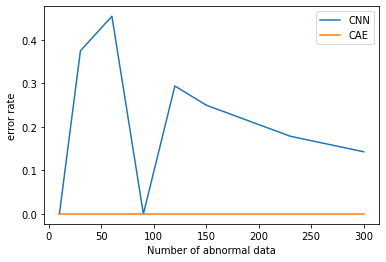

In [54]:
num_abnormal = [10, 30, 60, 90, 120, 150, 230, 300]

plt.plot(num_abnormal, cnn_err_rate, label = 'CNN')
plt.plot(num_abnormal, ae_err_rate, label = 'CAE')
plt.xlabel('Number of abnormal data')
plt.ylabel('error rate')
plt.legend()
plt.show()